<h1 align="center"> The Sparks Fundation </h1>
<h2 align="center"> Task 1 </h2>
<h2 align="center"> Linear Regression </h2>
<h5 align = "right"> by- </h5>
<h5 align = "right"> Shreeman Agrawal </h5>

### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sb
%matplotlib inline

### Extracting the data using the pandas inbuilt function
Pandas provide the function read_csv which can be used to read csv files from both you local memory and any liink to csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data visualisation
This gives us a basic idea of what trend the data follows

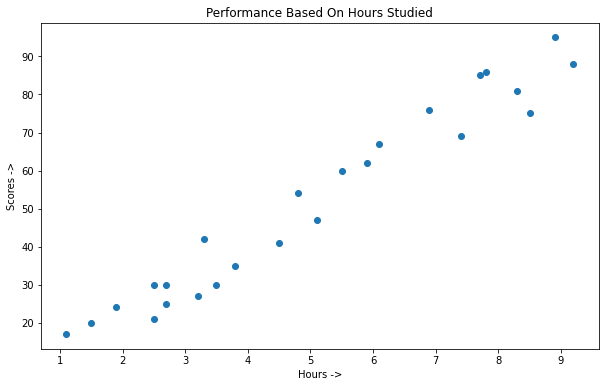

In [5]:
fig = plt.figure(figsize = (10,6))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("Hours ->")
plt.ylabel("Scores ->")
plt.title("Performance Based On Hours Studied")
plt.show()

We can see that score tends to increase as the number of hours increase

### Converting the data into arrays to feed into the algorithm

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values
print(X.shape,y.shape)

(25, 1) (25, 1)


### Dividing the data into train and test
This is done to check the performance of the predicted coefficients on data it has not seen before to give us a real world measure of how the model will perform and how well it generalises

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 10)
#set random state to get same or consistent(reproducible) results

In [9]:
print("Train Size =",X_train.size ,"\nTest Size =", X_test.size)

Train Size = 20 
Test Size = 5


### Performing Linear Regression with the help of SciKit Learn library
We first use the .fit() method to generate the coefficients and then the .score() method to check its performance on the whole dataset

In [10]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
linReg.score(X,y)

0.9527231506160442

### Predicting Values on the part of dataset the model has not been trained on to get accuracy

In [11]:
y_pred = linReg.predict(X_test)
df_y = pd.DataFrame(np.array([y_pred,y_test]).reshape(2,5).T,columns=['Predicted','Actual'])

In [12]:
df_y

,Predicted,Actual
0,17.371423,20.0
1,52.702923,47.0
2,35.037173,42.0
3,34.055743,27.0
4,46.814340,41.0


As we can see it is pretty close to the actual given values

### Plotting a graph to check how well the coefficients generated fit the dataset

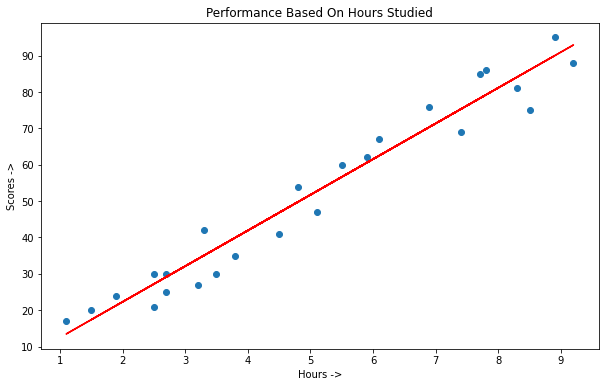

In [13]:
fig = plt.figure(figsize = (10,6))
plt.scatter(df['Hours'],df['Scores'])
plt.plot(X,linReg.intercept_ + linReg.coef_*X,color = 'red')
plt.xlabel("Hours ->")
plt.ylabel("Scores ->")
plt.title("Performance Based On Hours Studied")
plt.show()

It is evident that the model is giving a well generalised answer

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
score = linReg.predict(np.array(9.5).reshape(1,1))
print("Average Score Predicted by algorithm for a student who studies 9.5 hrs =",score[0][0])

Average Score Predicted by algorithm for a student who studies 9.5 hrs = 95.88586689797643


In [15]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 

MAE: 5.632881746692994


This is the mean absolute error which is a metric used to quantify the performance of the algorithm (the lower the m.a.e. the better)